First, we import everything we need and connect to the Reddit API

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

import os
from dotenv import load_dotenv
load_dotenv()

CLIENT_ID = os.getenv('CLIENT_ID')
CLIENT_SECRET=os.getenv('CLIENT_SECRET')
APP_NAME=os.getenv('APP_NAME')
REDDIT_USERNAME=os.getenv('REDDIT_USERNAME')
REDDIT_PASSWORD=os.getenv('REDDIT_PASSWORD')

import praw
import pandas as pd
import datetime as dt

reddit = praw.Reddit(client_id=CLIENT_ID, client_secret=CLIENT_SECRET, user_agent=APP_NAME, username=REDDIT_USERNAME, password=REDDIT_PASSWORD)

print(reddit.user.me())

%matplotlib inline

mattcat26


Next, we are going to read in the bad comment data given to us by a moderator of the 'neutralnews' subreddit.

In [34]:
import gzip
import shutil
with gzip.open('./neutralnews-2020-09-27.json.gz', 'rb') as f_in:
    with open('neutralnews-2020-09-27.json', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [35]:
comment_df = pd.read_json('neutralnews-2020-09-27.json', orient='records')

In [36]:
new_comment_df = comment_df[["action", "content", "author", "details", "submissionId", "id"]]
bad_comment_data = new_comment_df.rename(columns={"id" : "commentId"})
bad_comment_data


,action,content,author,details,submissionId,commentId
0,removecomment,"How is this""neutral news""? Literally, it's rep...",b756df5867ce042f3a07f3037e5eeeb9,Rule 5: top-level comment has no links,cgd7ut,5dea4ee94af43200093a2f4c
1,removecomment,Just wondering if you have any updates.,58843f7430c71f72208766a295eaae5e,Low effort top-level comment,cim6kf,5dea4ee94af43200093a2f4d
2,removecomment,.,f9dcef98ec140a8f44d5691d34081408,Rule 5: top-level comment has no links,cfzkky,5dea4ee94af43200093a2f4e
3,removecomment,I went to park,aab8641b0dc26f59e9c8fea95f470138,Low effort top-level comment,asrdao,5dea4ee94af43200093a2f4f
4,removecomment,"Hi, u/SFepicure\n\n[I think you may enjoy this...",e48fe0135108ee9985e260caf57cc6e0,remove,b47a1d,5dea4ee94af43200093a2f50
...,...,...,...,...,...,...
5997,removecomment,Oh I thought we were posting arbitrary facts t...,38e2216dc3dc2cb196cbf4bab0d83541,remove,j0ijwn,5f70e968dbe1ef0009d976e7
5998,removecomment,No. The senate is not wasting time to fill th...,c4f22a6532a4ca274c5027e4bc3d3d99,remove,j0ijwn,5f70e968dbe1ef0009d976e9
5999,approvecomment,"My point was not addressed, regarding providin...",062512f6041e1c40256c31f31a1138fc,unspam,j04eqv,5f70ee18dbe1ef0009d97717
6000,removecomment,Voting has begun in some states but the debate...,c696933b8cbd4b625077d6b577bac0fe,remove,j0ijwn,5f70f3f4dbe1ef0009d9775e


In [37]:
new_arr = bad_comment_data['submissionId'].to_list()
new_arr = np.array(new_arr)
submissions = np.unique(new_arr)
submissions = submissions.tolist()
submissions

['4o2o29',
 '4op948',
 '4sef35',
 '5x0k84',
 '64zsim',
 '68qqfz',
 '6907e3',
 '6mmw91',
 '6n161i',
 '6oftmx',
 '6xapy0',
 '7307wv',
 '76z4xh',
 '7ht8tj',
 '7hyg56',
 '7z5dyt',
 '804o3f',
 '862sn6',
 '8d0t2m',
 '8e7lrz',
 '8go559',
 '8hz10r',
 '8uby76',
 '8x2571',
 '8zp0uh',
 '91gwrp',
 '94q8j7',
 '96nrmf',
 '99fccg',
 '9c88xn',
 '9f2i6b',
 '9fj3m8',
 '9h0mo6',
 '9h82yb',
 '9ht83g',
 '9iqed1',
 '9j3gvd',
 '9jpdh7',
 '9kq8xy',
 '9ood1n',
 '9rbpt8',
 '9s3gd8',
 '9smhsl',
 '9xyyt0',
 '9zonfn',
 'a4tn3i',
 'a67z1j',
 'aab5gq',
 'ab7m8y',
 'ac7d56',
 'acz2f9',
 'ahxiba',
 'ailn92',
 'aj96gr',
 'ajvsq6',
 'alzqd0',
 'an9m5u',
 'andfa8',
 'apss2q',
 'asacv6',
 'asrdao',
 'auz29y',
 'axnhrj',
 'b47a1d',
 'b7e8o4',
 'b8cd1q',
 'b9d62h',
 'bj3tgb',
 'bjngf5',
 'bka66t',
 'blxd09',
 'bpi7u6',
 'busrz0',
 'bv8dl8',
 'bvk72a',
 'bxtj3y',
 'byiwll',
 'c109ai',
 'c3swuk',
 'c75b2i',
 'c7nqp7',
 'cess35',
 'cfa7tc',
 'cfa99a',
 'cfc5qa',
 'cfzkky',
 'cgd7ut',
 'cgks97',
 'cgkspq',
 'cgktg9',
 'cgkueu',

In [38]:
topics_dict = {'title':[], 'score':[], 'id':[], 'url':[], 'comms_num': [], 'created':[], 'body':[]}

for list_submission in submissions:
    submission = reddit.submission(id=list_submission)
    topics_dict['title'].append(submission.title)
    topics_dict['score'].append(submission.score)
    topics_dict['id'].append(submission.id)
    topics_dict['url'].append(submission.url)
    topics_dict['comms_num'].append(submission.num_comments)
    topics_dict['created'].append(submission.created)
    topics_dict['body'].append(submission.selftext)
topics_data = pd.DataFrame(topics_dict)

Now, we are going to parse in good comment data by scraping the neutral news subreddit.

In [39]:
comments_dict = {"action": [], "content": [], "author": [], "details": [], "submissionId": [], "commentId": []}

In [40]:
subreddit = reddit.subreddit('neutralnews')

for list_submission in submissions:
    submission = reddit.submission(id=list_submission)
    #print(submission.title, submission.id)
    submission.comments.replace_more(limit=100)
    for comment in submission.comments:
        #print(top_level_comment.body)
        comments_dict["action"].append(np.nan)
        comments_dict["content"].append(comment.body)
        comments_dict["author"].append(comment.author)
        comments_dict["details"].append(np.nan)
        comments_dict["submissionId"].append(submission.id)
        comments_dict["commentId"].append(comment.id)

good_comment_data = pd.DataFrame(comments_dict)

In [41]:
good_comment_data = good_comment_data[good_comment_data['author'] != 'AutoModerator']

In [42]:
good_comment_data = good_comment_data.reset_index()

In [43]:
good_comment_data = good_comment_data.drop(['index'], axis=1)
good_comment_data

,action,content,author,details,submissionId,commentId
0,NaN,"Just wanted to say ""thanks"" publicly. I'm ver...",zaphnod,NaN,4o2o29,d498hvk
1,NaN,"Hi, thanks for making this sub. A couple quest...",niugnep24,NaN,4o2o29,d49b7t2
2,NaN,"I'd like to say thanks to our ""focus group"" pa...",nosecohn,NaN,4o2o29,d498cxc
3,NaN,[removed],None,NaN,4o2o29,d4997am
4,NaN,"Can we get ""Moderator Activity Log"" for /r/Neu...",bloodguard,NaN,4o2o29,d49d04t
...,...,...,...,...,...,...
2606,NaN,"r/NeutralNews is a **curated space**, but desp...",NeutralverseBot,NaN,j0ijwn,g6rh4no
2607,NaN,__I'm a bot. Here are The Factual credibility ...,TheFactualBot,NaN,j0ijwn,g6rhg7f
2608,NaN,[removed],None,NaN,j0ijwn,g6ud0cs
2609,NaN,[removed],None,NaN,j0ijwn,g6ukt21


We can now combine the good comment data and bad comment data into one dataframe.

In [44]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime('%H:%M:%S')
print('current time = ', current_time)

current time =  21:41:29


After combining the good comment data, run sam's code on the whole comment data and then run the upvote predictor code on the features

In [47]:
good_comment_data.to_csv("good_comment_data_119.csv", index=False)
bad_comment_data.to_csv("bad_comment_data_119.csv", index=False)

In [6]:
from newspaper import Article
from newspaper import Config

user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'
config = Config()
config.browser_user_agent = user_agent

import spacy
from spacy import displacy
from collections import Counter
#!python -m spacy download en_core_web_lg
#!pip install spacy-wordnet

import en_core_web_lg
nlp = en_core_web_lg.load()

from spacy_wordnet.wordnet_annotator import WordnetAnnotator
nlp.add_pipe(WordnetAnnotator(nlp.lang), after='tagger')


STOP_WORDS = spacy.lang.en.stop_words.STOP_WORDS

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [52]:
frames = [good_comment_data, bad_comment_data]
comment_data = pd.concat(frames, ignore_index=True)
comment_data

,action,content,author,details,submissionId,commentId
0,NaN,"Just wanted to say ""thanks"" publicly. I'm ver...",zaphnod,NaN,4o2o29,d498hvk
1,NaN,"Hi, thanks for making this sub. A couple quest...",niugnep24,NaN,4o2o29,d49b7t2
2,NaN,"I'd like to say thanks to our ""focus group"" pa...",nosecohn,NaN,4o2o29,d498cxc
3,NaN,[removed],None,NaN,4o2o29,d4997am
4,NaN,"Can we get ""Moderator Activity Log"" for /r/Neu...",bloodguard,NaN,4o2o29,d49d04t
...,...,...,...,...,...,...
8608,removecomment,Oh I thought we were posting arbitrary facts t...,38e2216dc3dc2cb196cbf4bab0d83541,remove,j0ijwn,5f70e968dbe1ef0009d976e7
8609,removecomment,No. The senate is not wasting time to fill th...,c4f22a6532a4ca274c5027e4bc3d3d99,remove,j0ijwn,5f70e968dbe1ef0009d976e9
8610,approvecomment,"My point was not addressed, regarding providin...",062512f6041e1c40256c31f31a1138fc,unspam,j04eqv,5f70ee18dbe1ef0009d97717
8611,removecomment,Voting has begun in some states but the debate...,c696933b8cbd4b625077d6b577bac0fe,remove,j0ijwn,5f70f3f4dbe1ef0009d9775e


In [7]:
good_comment_data = pd.read_csv('good_comment_data_119.csv')
bad_comment_data = pd.read_csv('bad_comment_data_119.csv')
frames = [good_comment_data, bad_comment_data]
comment_data = pd.concat(frames, ignore_index=True)
comment_data

,action,content,author,details,submissionId,commentId
0,NaN,"Just wanted to say ""thanks"" publicly. I'm ver...",zaphnod,NaN,4o2o29,d498hvk
1,NaN,"Hi, thanks for making this sub. A couple quest...",niugnep24,NaN,4o2o29,d49b7t2
2,NaN,"I'd like to say thanks to our ""focus group"" pa...",nosecohn,NaN,4o2o29,d498cxc
3,NaN,[removed],NaN,NaN,4o2o29,d4997am
4,NaN,"Can we get ""Moderator Activity Log"" for /r/Neu...",bloodguard,NaN,4o2o29,d49d04t
...,...,...,...,...,...,...
8608,removecomment,Oh I thought we were posting arbitrary facts t...,38e2216dc3dc2cb196cbf4bab0d83541,remove,j0ijwn,5f70e968dbe1ef0009d976e7
8609,removecomment,No. The senate is not wasting time to fill th...,c4f22a6532a4ca274c5027e4bc3d3d99,remove,j0ijwn,5f70e968dbe1ef0009d976e9
8610,approvecomment,"My point was not addressed, regarding providin...",062512f6041e1c40256c31f31a1138fc,unspam,j04eqv,5f70ee18dbe1ef0009d97717
8611,removecomment,Voting has begun in some states but the debate...,c696933b8cbd4b625077d6b577bac0fe,remove,j0ijwn,5f70f3f4dbe1ef0009d9775e


In [93]:
import nltk
nltk.download('wordnet')

from datetime import datetime
now = datetime.now()
current_time = now.strftime('%H:%M:%S')
print('current time = ', current_time)

def clean_articles(topics_data, comment_data, text_list):
    for url in topics_data['url']:
        try:
            article = Article(url, language='en', fetch_images=False, config = config)
            article.download()
            article.parse()
            art_text = article.text
            art_doc = nlp(art_text.lower())
            text_list.append(art_doc)
        #if there is an exception, remove comments that go with this article
        except:
            text_list.append("error")
            subId = topics_data[topics_data['url'] == url]['id']
            subId = subId.to_numpy()
            subId = subId[0]
            comment_data = comment_data[comment_data['submissionId'] != subId]
            continue
    topics_data['text'] = text_list

clean_articles(topics_data, comment_data, [])
# url = 'https://www.washingtonpost.com/world/national-security/sessions-spoke-twice-with-russian-ambassador-during-trumps-presidential-campaign-justice-officials-say/2017/03/01/77205eda-feac-11e6-99b4-9e613afeb09f_story.html?hpid=hp_rhp-top-table-main_no-name%3Ahomepage%2Fstory&utm_term=.f2a14c329123'
# subId = topics_data[topics_data['url'] == url]['id']
# subId = subId.to_numpy()
# subId = subId[0]
# subId

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mattc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
current time =  23:16:59


In [94]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime('%H:%M:%S')
print('current time = ', current_time)

current time =  23:40:41


In [96]:
topics_data.to_csv("topics_data_119.csv", index=False)

In [8]:
topics_data = pd.read_csv('topics_data_119.csv')
topics_data

,title,score,id,url,comms_num,created,body,text
0,[META] Welcome to NeutralNews,225,4o2o29,https://www.reddit.com/r/neutralnews/comments/...,66,1.465955e+09,The goal of /r/NeutralNews is to provide a pla...,the goal of r/neutralnews is to provide a plac...
1,Wall Street has been rocked by an $8 billion h...,183,4op948,http://www.businessinsider.com/visium-asset-ma...,10,1.466297e+09,NaN,"jake gottlieb, the founder of visium. reuters/..."
2,How a $2 Roadside Drug Test Sends Innocent Peo...,91,4sef35,http://www.nytimes.com/2016/07/10/magazine/how...,11,1.468315e+09,NaN,field tests provide quick answers. but if thos...
3,Sessions spoke twice with Russian ambassador d...,668,5x0k84,https://www.washingtonpost.com/world/national-...,84,1.488450e+09,NaN,error
4,The Russia story just keeps getting worse for ...,90,64zsim,http://www.cnn.com/2017/04/12/politics/trump-c...,31,1.492048e+09,NaN,washington (cnn) two stories dealing with russ...
...,...,...,...,...,...,...,...,...
531,Trump falsely claimed an incident where an ele...,9,j078ii,https://www.businessinsider.com/trump-falsely-...,39,1.601160e+09,NaN,president donald trump falsely claimed that an...
532,‘It’s like every red flag’: Trump-ordered HHS ...,5,j099m5,https://www.politico.com/news/2020/09/25/trump...,4,1.601167e+09,NaN,"the $15 million contract, which has not been p..."
533,Fact-Checking Falsehoods on Mail-In Voting - V...,15,j09b0v,https://www.nytimes.com/article/fact-checking-...,3,1.601167e+09,NaN,if you are among the tens of millions of ameri...
534,How a Pledge to Dismantle the Minneapolis Poli...,3,j0h85d,https://www.nytimes.com/2020/09/26/us/politics...,3,1.601195e+09,[deleted],"minneapolis — over three months ago, a majorit..."


In [18]:
#nlp = spacy.load('en_core_web_lg')
def getSimWordScore(comment_data, topics_data, simWordScore):
    for index, comment in comment_data.iterrows():
        subID = comment['submissionId'] #get submission id from comment table
        post = topics_data[topics_data['id'] == subID]
        art_doc = post['text']
        
        art_doc = art_doc.to_numpy()
        art_doc = art_doc[0]
        art_doc = nlp(str(art_doc))
        #art_doc = nlp(art_doc)
        art_items = [x.text for x in art_doc.ents]
        #get tokens
        art_tokens = []
        for (item, count) in Counter(art_items).most_common(5):
            token = nlp(item)[0]
            art_tokens += [token]
        #get comment content and ner
        comment_text = comment['content']
        comment_text = str(comment_text)
        doc = nlp(str(comment_text).lower())

        items = [x.text for x in doc.ents]

        #initialize list of scores
        score = 0
        #for each token, get a score
        for (item, count) in Counter(items).most_common(5):

            #get token
            token = nlp(item)#[0]

            wordScores = []

            #for each article item
            for art_word in art_tokens:

                #add similarity score to list of scores
                wordScores += [art_word.similarity(token)]
            #get average score
            if len(wordScores) != 0:
                score += sum(wordScores)/len(wordScores)
            else:
                score = 0
        simWordScore.append(score)
    return simWordScore

wordScoreList = getSimWordScore(comment_data, topics_data, [])
comment_data['WordScore'] = wordScoreList

In [19]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime('%H:%M:%S')
print('current time = ', current_time)

current time =  11:16:40


In [21]:
comment_data.to_csv("comment_data_1110.csv", index=False)

In [29]:
def getSimWholeScore(comment_data, topics_data, simWholeScore):
    for index, comment in comment_data.iterrows():
        subID = comment['submissionId']
        #get article text
        post = topics_data[topics_data['id'] == subID]
        art_doc = str(post['text'])
        art_doc = nlp(art_doc)
        #get comment content and ner
        comment_text = comment['content']
        comment_text = str(comment).lower()
        doc = nlp(comment_text)
        #compare to get a score
        simWholeScore.append(art_doc.similarity(doc))
    return simWholeScore

wholeScoreList = getSimWholeScore(comment_data, topics_data, [])
comment_data['WholeScore'] = wholeScoreList

In [30]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime('%H:%M:%S')
print('current time = ', current_time)

current time =  12:15:46


In [32]:
comment_data.to_csv("comment_data_1110.csv", index=False)

In [33]:
comment_data.to_csv('full_comment_data_with_features119.csv', index=False)

# Final cleaning of data (hopefully)

In [3]:
#Wanted to compare full data with original combo of data
good_comment_data = pd.read_csv('good_comment_data_119.csv')
bad_comment_data = pd.read_csv('bad_comment_data_119.csv')
frames = [good_comment_data, bad_comment_data]
comment_data = pd.concat(frames, ignore_index=True)
comment_data

,action,content,author,details,submissionId,commentId
0,NaN,"Just wanted to say ""thanks"" publicly. I'm ver...",zaphnod,NaN,4o2o29,d498hvk
1,NaN,"Hi, thanks for making this sub. A couple quest...",niugnep24,NaN,4o2o29,d49b7t2
2,NaN,"I'd like to say thanks to our ""focus group"" pa...",nosecohn,NaN,4o2o29,d498cxc
3,NaN,[removed],NaN,NaN,4o2o29,d4997am
4,NaN,"Can we get ""Moderator Activity Log"" for /r/Neu...",bloodguard,NaN,4o2o29,d49d04t
...,...,...,...,...,...,...
8608,removecomment,Oh I thought we were posting arbitrary facts t...,38e2216dc3dc2cb196cbf4bab0d83541,remove,j0ijwn,5f70e968dbe1ef0009d976e7
8609,removecomment,No. The senate is not wasting time to fill th...,c4f22a6532a4ca274c5027e4bc3d3d99,remove,j0ijwn,5f70e968dbe1ef0009d976e9
8610,approvecomment,"My point was not addressed, regarding providin...",062512f6041e1c40256c31f31a1138fc,unspam,j04eqv,5f70ee18dbe1ef0009d97717
8611,removecomment,Voting has begun in some states but the debate...,c696933b8cbd4b625077d6b577bac0fe,remove,j0ijwn,5f70f3f4dbe1ef0009d9775e


In [18]:
final_comment_data = pd.read_csv('full_comment_data_with_features119.csv')
final_comment_data

,action,content,author,details,submissionId,commentId,WordScore,WholeScore
0,NaN,"Just wanted to say ""thanks"" publicly. I'm ver...",zaphnod,NaN,4o2o29,d498hvk,0.055391,0.869869
1,NaN,"Hi, thanks for making this sub. A couple quest...",niugnep24,NaN,4o2o29,d49b7t2,0.000000,0.896084
2,NaN,"I'd like to say thanks to our ""focus group"" pa...",nosecohn,NaN,4o2o29,d498cxc,0.371254,0.877248
3,NaN,[removed],NaN,NaN,4o2o29,d4997am,0.000000,0.810516
4,NaN,"Can we get ""Moderator Activity Log"" for /r/Neu...",bloodguard,NaN,4o2o29,d49d04t,0.000000,0.897533
...,...,...,...,...,...,...,...,...
8608,removecomment,Oh I thought we were posting arbitrary facts t...,38e2216dc3dc2cb196cbf4bab0d83541,remove,j0ijwn,5f70e968dbe1ef0009d976e7,0.000000,0.838691
8609,removecomment,No. The senate is not wasting time to fill th...,c4f22a6532a4ca274c5027e4bc3d3d99,remove,j0ijwn,5f70e968dbe1ef0009d976e9,0.459704,0.840920
8610,approvecomment,"My point was not addressed, regarding providin...",062512f6041e1c40256c31f31a1138fc,unspam,j04eqv,5f70ee18dbe1ef0009d97717,1.281814,0.863294
8611,removecomment,Voting has begun in some states but the debate...,c696933b8cbd4b625077d6b577bac0fe,remove,j0ijwn,5f70f3f4dbe1ef0009d9775e,0.000000,0.820983


### Final data is same size as original combo (8613 rows), so have some bad data yet

In [19]:
topics_data = pd.read_csv('topics_data_119.csv')
topics_data

,title,score,id,url,comms_num,created,body,text
0,[META] Welcome to NeutralNews,225,4o2o29,https://www.reddit.com/r/neutralnews/comments/...,66,1.465955e+09,The goal of /r/NeutralNews is to provide a pla...,the goal of r/neutralnews is to provide a plac...
1,Wall Street has been rocked by an $8 billion h...,183,4op948,http://www.businessinsider.com/visium-asset-ma...,10,1.466297e+09,NaN,"jake gottlieb, the founder of visium. reuters/..."
2,How a $2 Roadside Drug Test Sends Innocent Peo...,91,4sef35,http://www.nytimes.com/2016/07/10/magazine/how...,11,1.468315e+09,NaN,field tests provide quick answers. but if thos...
3,Sessions spoke twice with Russian ambassador d...,668,5x0k84,https://www.washingtonpost.com/world/national-...,84,1.488450e+09,NaN,error
4,The Russia story just keeps getting worse for ...,90,64zsim,http://www.cnn.com/2017/04/12/politics/trump-c...,31,1.492048e+09,NaN,washington (cnn) two stories dealing with russ...
...,...,...,...,...,...,...,...,...
531,Trump falsely claimed an incident where an ele...,9,j078ii,https://www.businessinsider.com/trump-falsely-...,39,1.601160e+09,NaN,president donald trump falsely claimed that an...
532,‘It’s like every red flag’: Trump-ordered HHS ...,5,j099m5,https://www.politico.com/news/2020/09/25/trump...,4,1.601167e+09,NaN,"the $15 million contract, which has not been p..."
533,Fact-Checking Falsehoods on Mail-In Voting - V...,15,j09b0v,https://www.nytimes.com/article/fact-checking-...,3,1.601167e+09,NaN,if you are among the tens of millions of ameri...
534,How a Pledge to Dismantle the Minneapolis Poli...,3,j0h85d,https://www.nytimes.com/2020/09/26/us/politics...,3,1.601195e+09,[deleted],"minneapolis — over three months ago, a majorit..."


In [20]:
removed_topics = topics_data[topics_data['text'] == "error"]
removed_topics

,title,score,id,url,comms_num,created,body,text
3,Sessions spoke twice with Russian ambassador d...,668,5x0k84,https://www.washingtonpost.com/world/national-...,84,1.488450e+09,NaN,error
34,‘Kavanaugh will be on the U.S. Supreme Court’:...,317,9ht83g,https://www.washingtonpost.com/politics/2018/0...,173,1.537587e+09,[deleted],error
39,Google really is trying to build a censored Ch...,458,9ood1n,https://www.washingtonpost.com/technology/2018...,73,1.539731e+09,NaN,error
40,Judge orders Ga. officials to stop tossing abs...,76,9rbpt8,https://www.washingtonpost.com/politics/judge-...,7,1.540513e+09,NaN,error
74,Justice Department does not comply with court ...,317,bvk72a,https://www.washingtonpost.com/politics/justic...,13,1.559420e+09,NaN,error
93,Update on NN in This Post: [META] r/NeutralPol...,68,f8says,/r/NeutralPolitics/comments/f3fyvr/meta_rneutr...,10,1.582585e+09,NaN,error
123,"In unusual deal, U.S. Treasury to acquire 30 p...",214,hjimwh,https://www.washingtonpost.com/business/2020/0...,25,1.593665e+09,NaN,error
151,Evictions are likely to skyrocket this summer ...,36,hmor9m,https://www.washingtonpost.com/business/2020/0...,17,1.594130e+09,NaN,error
165,Can Trump delay the release of his taxes to Ma...,11,ho63fl,https://www.washingtonpost.com/politics/courts...,7,1.594341e+09,NaN,error
171,Robert Mueller: Roger Stone remains a convicte...,369,hpjk4b,https://www.washingtonpost.com/opinions/2020/0...,48,1.594537e+09,NaN,error


In [21]:
removed_comments = final_comment_data[final_comment_data['submissionId'].isin(removed_topics['id'])]

In [22]:
removed_comments

,action,content,author,details,submissionId,commentId,WordScore,WholeScore
33,NaN,[removed],NaN,NaN,5x0k84,deegcr4,0.0,0.819557
34,NaN,Here is [Sessions' response](https://twitter.c...,IDrink_n_IKnowThings,NaN,5x0k84,deegxs1,0.0,0.842452
35,NaN,Question: how does this not come out during th...,such-a-mensch,NaN,5x0k84,deerirr,0.0,0.800308
36,NaN,[removed],NaN,NaN,5x0k84,deedont,0.0,0.818399
37,NaN,[removed],NaN,NaN,5x0k84,deenab8,0.0,0.816503
...,...,...,...,...,...,...,...,...
8443,approvecomment,That wasnt the question the reporter asked.,c4f22a6532a4ca274c5027e4bc3d3d99,confirm_ham,iyoo0x,5f6d1107dbe1ef0009d95b3e,0.0,0.783706
8444,approvecomment,But in this thread we have specifically called...,38e2216dc3dc2cb196cbf4bab0d83541,unspam,iyoo0x,5f6d1b93dbe1ef0009d95b85,0.0,0.780085
8478,removecomment,Good bot!,0a0c22e1c4803b776901400bd71cdceb,Memes,izrbbb,5f6e9d20dbe1ef0009d967fd,0.0,0.818553
8479,removecomment,Over exaggerating fear mongering title. He won...,a1397b06b9fffbe73d9cb8c77bc1e1ae,remove,iyoo0x,5f6ece57dbe1ef0009d968e4,0.0,0.748502


In [23]:
final_comment_data = final_comment_data[~final_comment_data['submissionId'].isin(removed_topics['id'])]
final_comment_data

,action,content,author,details,submissionId,commentId,WordScore,WholeScore
0,NaN,"Just wanted to say ""thanks"" publicly. I'm ver...",zaphnod,NaN,4o2o29,d498hvk,0.055391,0.869869
1,NaN,"Hi, thanks for making this sub. A couple quest...",niugnep24,NaN,4o2o29,d49b7t2,0.000000,0.896084
2,NaN,"I'd like to say thanks to our ""focus group"" pa...",nosecohn,NaN,4o2o29,d498cxc,0.371254,0.877248
3,NaN,[removed],NaN,NaN,4o2o29,d4997am,0.000000,0.810516
4,NaN,"Can we get ""Moderator Activity Log"" for /r/Neu...",bloodguard,NaN,4o2o29,d49d04t,0.000000,0.897533
...,...,...,...,...,...,...,...,...
8608,removecomment,Oh I thought we were posting arbitrary facts t...,38e2216dc3dc2cb196cbf4bab0d83541,remove,j0ijwn,5f70e968dbe1ef0009d976e7,0.000000,0.838691
8609,removecomment,No. The senate is not wasting time to fill th...,c4f22a6532a4ca274c5027e4bc3d3d99,remove,j0ijwn,5f70e968dbe1ef0009d976e9,0.459704,0.840920
8610,approvecomment,"My point was not addressed, regarding providin...",062512f6041e1c40256c31f31a1138fc,unspam,j04eqv,5f70ee18dbe1ef0009d97717,1.281814,0.863294
8611,removecomment,Voting has begun in some states but the debate...,c696933b8cbd4b625077d6b577bac0fe,remove,j0ijwn,5f70f3f4dbe1ef0009d9775e,0.000000,0.820983


In [24]:
final_comment_data = final_comment_data[final_comment_data['content'] != "[removed]"]
final_comment_data = final_comment_data[final_comment_data['content'] != "[deleted]"]
final_comment_data

,action,content,author,details,submissionId,commentId,WordScore,WholeScore
0,NaN,"Just wanted to say ""thanks"" publicly. I'm ver...",zaphnod,NaN,4o2o29,d498hvk,0.055391,0.869869
1,NaN,"Hi, thanks for making this sub. A couple quest...",niugnep24,NaN,4o2o29,d49b7t2,0.000000,0.896084
2,NaN,"I'd like to say thanks to our ""focus group"" pa...",nosecohn,NaN,4o2o29,d498cxc,0.371254,0.877248
4,NaN,"Can we get ""Moderator Activity Log"" for /r/Neu...",bloodguard,NaN,4o2o29,d49d04t,0.000000,0.897533
5,NaN,Will political and election news be deleted si...,NaN,NaN,4o2o29,d497qee,0.000000,0.854950
...,...,...,...,...,...,...,...,...
8608,removecomment,Oh I thought we were posting arbitrary facts t...,38e2216dc3dc2cb196cbf4bab0d83541,remove,j0ijwn,5f70e968dbe1ef0009d976e7,0.000000,0.838691
8609,removecomment,No. The senate is not wasting time to fill th...,c4f22a6532a4ca274c5027e4bc3d3d99,remove,j0ijwn,5f70e968dbe1ef0009d976e9,0.459704,0.840920
8610,approvecomment,"My point was not addressed, regarding providin...",062512f6041e1c40256c31f31a1138fc,unspam,j04eqv,5f70ee18dbe1ef0009d97717,1.281814,0.863294
8611,removecomment,Voting has begun in some states but the debate...,c696933b8cbd4b625077d6b577bac0fe,remove,j0ijwn,5f70f3f4dbe1ef0009d9775e,0.000000,0.820983


In [25]:
final_comment_data = final_comment_data[final_comment_data['submissionId'] != '4o2o29']
final_comment_data

,action,content,author,details,submissionId,commentId,WordScore,WholeScore
28,NaN,So what are the implications here? Does it onl...,Cody_Fox23,NaN,4op948,d4eictg,0.000000,0.849655
30,NaN,Sadly this isn't new. Police officers use many...,DrFrenchman,NaN,4sef35,d58ts90,0.000000,0.900283
31,NaN,What's disturbing about this is that our gover...,bbakks,NaN,4sef35,d58y081,-0.038865,0.869078
32,NaN,What I find really concerning is the horrible ...,poliscijunki,NaN,4sef35,d5919n8,0.000000,0.898426
38,NaN,This subject might have legs but this article ...,interweb1,NaN,64zsim,dg6l969,0.000000,0.850127
...,...,...,...,...,...,...,...,...
8608,removecomment,Oh I thought we were posting arbitrary facts t...,38e2216dc3dc2cb196cbf4bab0d83541,remove,j0ijwn,5f70e968dbe1ef0009d976e7,0.000000,0.838691
8609,removecomment,No. The senate is not wasting time to fill th...,c4f22a6532a4ca274c5027e4bc3d3d99,remove,j0ijwn,5f70e968dbe1ef0009d976e9,0.459704,0.840920
8610,approvecomment,"My point was not addressed, regarding providin...",062512f6041e1c40256c31f31a1138fc,unspam,j04eqv,5f70ee18dbe1ef0009d97717,1.281814,0.863294
8611,removecomment,Voting has begun in some states but the debate...,c696933b8cbd4b625077d6b577bac0fe,remove,j0ijwn,5f70f3f4dbe1ef0009d9775e,0.000000,0.820983


In [26]:
final_comment_data.to_csv('full_comment_data_with_features1110.csv', index=False)

### Wanted to see amount of bad comments

In [35]:
good_comment_length = final_comment_data[pd.isna(final_comment_data['action'])]
good_comment_length

,action,content,author,details,submissionId,commentId,WordScore,WholeScore
28,NaN,So what are the implications here? Does it onl...,Cody_Fox23,NaN,4op948,d4eictg,0.000000,0.849655
30,NaN,Sadly this isn't new. Police officers use many...,DrFrenchman,NaN,4sef35,d58ts90,0.000000,0.900283
31,NaN,What's disturbing about this is that our gover...,bbakks,NaN,4sef35,d58y081,-0.038865,0.869078
32,NaN,What I find really concerning is the horrible ...,poliscijunki,NaN,4sef35,d5919n8,0.000000,0.898426
38,NaN,This subject might have legs but this article ...,interweb1,NaN,64zsim,dg6l969,0.000000,0.850127
...,...,...,...,...,...,...,...,...
2604,NaN,__I'm a bot. Here are The Factual credibility ...,TheFactualBot,NaN,j0h85d,g6r4cxh,1.512839,0.818242
2605,NaN,They had a real chance to do something new and...,911roofer,NaN,j0h85d,g6r7c8r,0.000000,0.855738
2606,NaN,"r/NeutralNews is a **curated space**, but desp...",NeutralverseBot,NaN,j0ijwn,g6rh4no,0.080495,0.791657
2607,NaN,__I'm a bot. Here are The Factual credibility ...,TheFactualBot,NaN,j0ijwn,g6rhg7f,0.811500,0.815048


### Machine Learning

In [148]:
full_comment_data = pd.read_csv('full_comment_data_with_features1110.csv')

In [149]:
full_comment_data = full_comment_data.replace({'action': {'removecomment': 0, 'approvecomment': 0, np.nan: 1}})

In [150]:
full_comment_data['action'] = full_comment_data['action'].astype('bool')

In [151]:
X = full_comment_data[['WordScore', 'WholeScore']]
X = X.to_numpy()
y = full_comment_data['action']
y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=20)

In [152]:
from sklearn.neighbors import KNeighborsClassifier

In [153]:
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [154]:
y_val = neigh.predict(X_test)

In [155]:
percent_arr = (y_test == y_val)
count = np.count_nonzero(percent_arr)
percentage = (count/(len(percent_arr)))*100
percentage

73.69082530372853

In [156]:
colors = {0: 'red', 1: 'green'}
markers = {0: 'x', 1: '.'}

y_train = np.array(y_train)
y_train = y_train.astype(int)
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [163]:
def plotting(x, y, truth):
    df = pd.DataFrame(x)
    df = df.rename(columns={0: 'WordScore', 1: 'WholeScore'})
    df['action'] = y
    for i in range(2):
        new_df = df[df['action'] == i]
        plt.scatter(new_df['WordScore'], new_df['WholeScore'], c=colors[i], marker=markers[i], label=i)

    plt.xlabel('WordScore')
    plt.ylabel('WholeScore')
    if truth:
        plt.title('True Testing Labels')
    else:
        plt.title('Predicted Testing Labels')

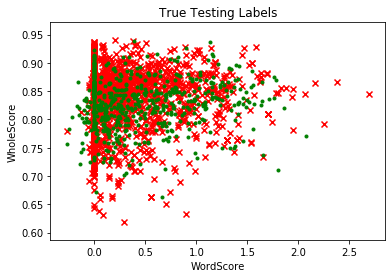

In [165]:
plotting(X_test, y_test, True)

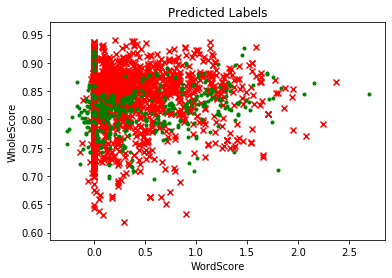

In [166]:
plotting(X_test, y_val, False)